## CNN Autoencoder

In [1]:
from keras.utils.vis_utils import plot_model
from keras_visualizer import visualizer
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from autoencoders.CAE import CAE

DATASET_SIZE = 25082
INPUT_SHAPE = (40, 40, 1)

In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [3]:
datagen = ImageDataGenerator(
                        rescale=1./255,
                        validation_split=0.2,
                        horizontal_flip=True)
# Allow horizontal flip as a mirror image of a game is a valid game state

train_datagen = datagen.flow_from_directory('images_trans/',
                                            target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
                                            color_mode='grayscale',
                                            class_mode='input',
                                            shuffle=True,
                                            subset='training')

val_datagen = datagen.flow_from_directory('images_trans/',
                                                target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
                                            color_mode='grayscale',
                                            class_mode='input',
                                            shuffle=True,
                                            subset='validation')

Found 20067 images belonging to 1 classes.
Found 5016 images belonging to 1 classes.


In [4]:
cae = CAE(
    layers=4,
    input_shape=INPUT_SHAPE,
    latent_size=16,
    name="CAE")
cae.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 40, 40, 1)]       0         
_________________________________________________________________
conv1_enc (Conv2D)           (None, 40, 40, 16)        160       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 20, 20, 16)        0         
_________________________________________________________________
conv2_enc (Conv2D)           (None, 20, 20, 32)        4640      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 10, 10, 32)        0         
_________________________________________________________________
conv3_enc (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 5, 5, 64)          0   

In [5]:
callbacks = [
    #EarlyStopping(monitor='val_loss', patience=10)
]

history = cae.train(
    train_datagen, 
    val_datagen, 
    epochs=100, 
    callbacks=callbacks
)

Epoch 1/100
628/628 [==============================] - 26s 27ms/step - loss: 0.0672 - val_loss: 0.0064
Epoch 2/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0062 - val_loss: 0.0046
Epoch 3/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 4/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 5/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 6/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 7/100
628/628 [==============================] - 5s 9ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 8/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 9/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/100
628/628 [==============================] - 5s 9ms/step - loss: 0.0025 - val_

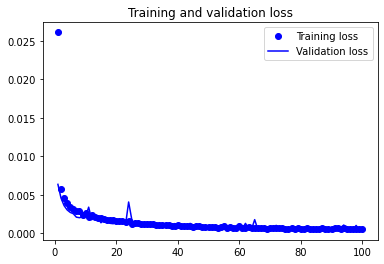

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)    

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

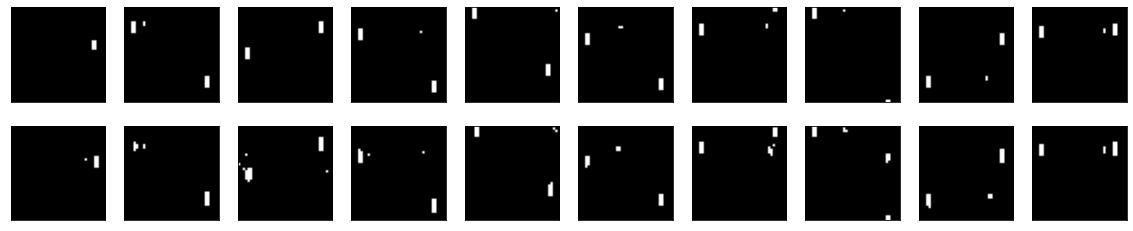

In [8]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import random

n = 10
images = np.empty((n, *INPUT_SHAPE))

for i in range(n):
    rand_img = random.randint(0, DATASET_SIZE)
    img = img_to_array(load_img(f"images_trans/pong_trans_{rand_img}.png", color_mode='grayscale'))
    images[i] = img

decoded_imgs = cae.predict(images)

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
